# **Residential Property Exploratory Data Analysis**

**Analyst:** Noah Oyugi

This **Residential Property Analysis** focuses on understanding the value, sale amount and volume of residential properties in Connecticut State's Real Estate Market. 

This analysis is designed to future residential property owners to make informed decision when buying or selling residential properties. 

>There are **Pivot Tables** generated to summarise annual and towns' summary. 

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from scipy import stats

# viz customizations
params = {
    "lines.linewidth": 1.5,
    "axes.labelsize": 14,
    "axes.titlesize": 18,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(context = 'paper', style='white', palette='deep', rc=params)
plt.rcParams['font.family']='Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (15,6)
pd.options.display.float_format = "{:,.2f}".format

## **Data Loading and Cleaning**

In [44]:
property_df = (pd
               .read_csv('property_data.csv',index_col='serial_number', parse_dates=['date_recorded'])
               .assign(sale_z_score = lambda x: stats.zscore(x.sale_amount).abs())
               .query('town != "***Unknown***" and '\
                    'sale_amount > 0 and '\
                        'sales_ratio < 1 and '\
                            'assessed_value > 0 and '\
                                'sale_z_score <= 3')
               .sort_index()
               )
property_df.head()

,list_year,date_recorded,town,property_type,residential_type,sales_ratio,assessed_value,sale_amount,sale_z_score
serial_number,,,,,,,,,
21,2021,2021-10-05,Marlborough,Residential,Single Family,0.54,"201,240.00",370000,0.00
82,2008,2008-10-01,Meriden,Single Family,Single Family,0.84,"144,210.00",171000,0.22
83,2008,2008-10-01,Meriden,Single Family,Single Family,0.65,"187,780.00",290000,0.09
84,2008,2008-10-01,Meriden,Single Family,Single Family,0.90,"166,770.00",185000,0.20
85,2008,2008-10-01,Meriden,Single Family,Single Family,0.81,"140,170.00",172000,0.21


In [45]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561255 entries, 21 to 2000500023
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   list_year         561255 non-null  int64         
 1   date_recorded     561255 non-null  datetime64[ns]
 2   town              561255 non-null  object        
 3   property_type     561255 non-null  object        
 4   residential_type  561255 non-null  object        
 5   sales_ratio       561255 non-null  float64       
 6   assessed_value    561255 non-null  float64       
 7   sale_amount       561255 non-null  int64         
 8   sale_z_score      561255 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 42.8+ MB


In [46]:
property_df.property_type.unique()

array(['Residential', 'Single Family', 'Condo', 'Two Family',
       'Three Family', 'Four Family'], dtype=object)

In [47]:
property_df.residential_type.unique()

array(['Single Family', 'Condo', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [48]:
property_df = property_df.drop(columns='property_type')

## **Property types values**

### **(a) _Property Value for each resisdential type per town_**

In [49]:
property_value_per_type_per_town = (property_df
                                    .reset_index()
                                    .pivot_table(
                                        index=['town'],
                                        columns='residential_type',
                                        values='assessed_value',
                                        aggfunc='mean'
                                        )
                                    .fillna(0)
                                    )
property_value_per_type_per_town

residential_type,Condo,Four Family,Single Family,Three Family,Two Family
town,,,,,
Andover,0.00,0.00,"177,732.81",0.00,"164,530.00"
Ansonia,"95,547.51","156,220.59","135,552.29","137,505.34","124,409.88"
Ashford,"39,181.82",0.00,"140,801.35",0.00,"173,430.00"
Avon,"175,933.76",0.00,"351,480.94","223,150.00","215,420.00"
Barkhamsted,0.00,0.00,"174,197.45","194,580.00","256,585.00"
...,...,...,...,...,...
Windsor Locks,"91,891.76","165,370.00","120,089.40","130,130.00","125,795.37"
Wolcott,"129,422.79","157,970.00","173,520.89","264,430.00","173,991.58"
Woodbridge,"132,202.00","160,020.00","313,051.93",0.00,"177,379.46"


### **(b) _Annual Value Trend_**

In [50]:
property_value_per_year = (property_df
                                    .reset_index()
                                    .pivot_table(
                                        index=['list_year'],
                                        columns='residential_type',
                                        values='assessed_value',
                                        aggfunc='mean'
                                        )
                                    .fillna(0)
                                    )
property_value_per_year

residential_type,Condo,Four Family,Single Family,Three Family,Two Family
list_year,,,,,
2006,"122,057.02","125,573.64","243,473.10","122,591.58","145,504.73"
2007,"139,027.29","170,858.50","248,036.25","139,753.27","151,431.06"
2008,"154,812.25","204,089.61","244,983.75","131,837.33","161,751.81"
2009,"169,279.79","178,377.31","286,243.11","138,677.99","175,771.63"
2010,"179,219.80","180,173.70","278,810.98","135,693.02","155,555.18"
2011,"197,189.92","188,770.38","322,367.90","167,691.98","183,014.94"
2012,"176,507.85","189,322.00","283,671.85","134,801.82","167,245.53"
2013,"158,928.46","183,214.59","249,830.50","124,133.00","152,552.53"
2014,"158,855.05","193,291.02","260,751.38","124,619.32","153,476.62"


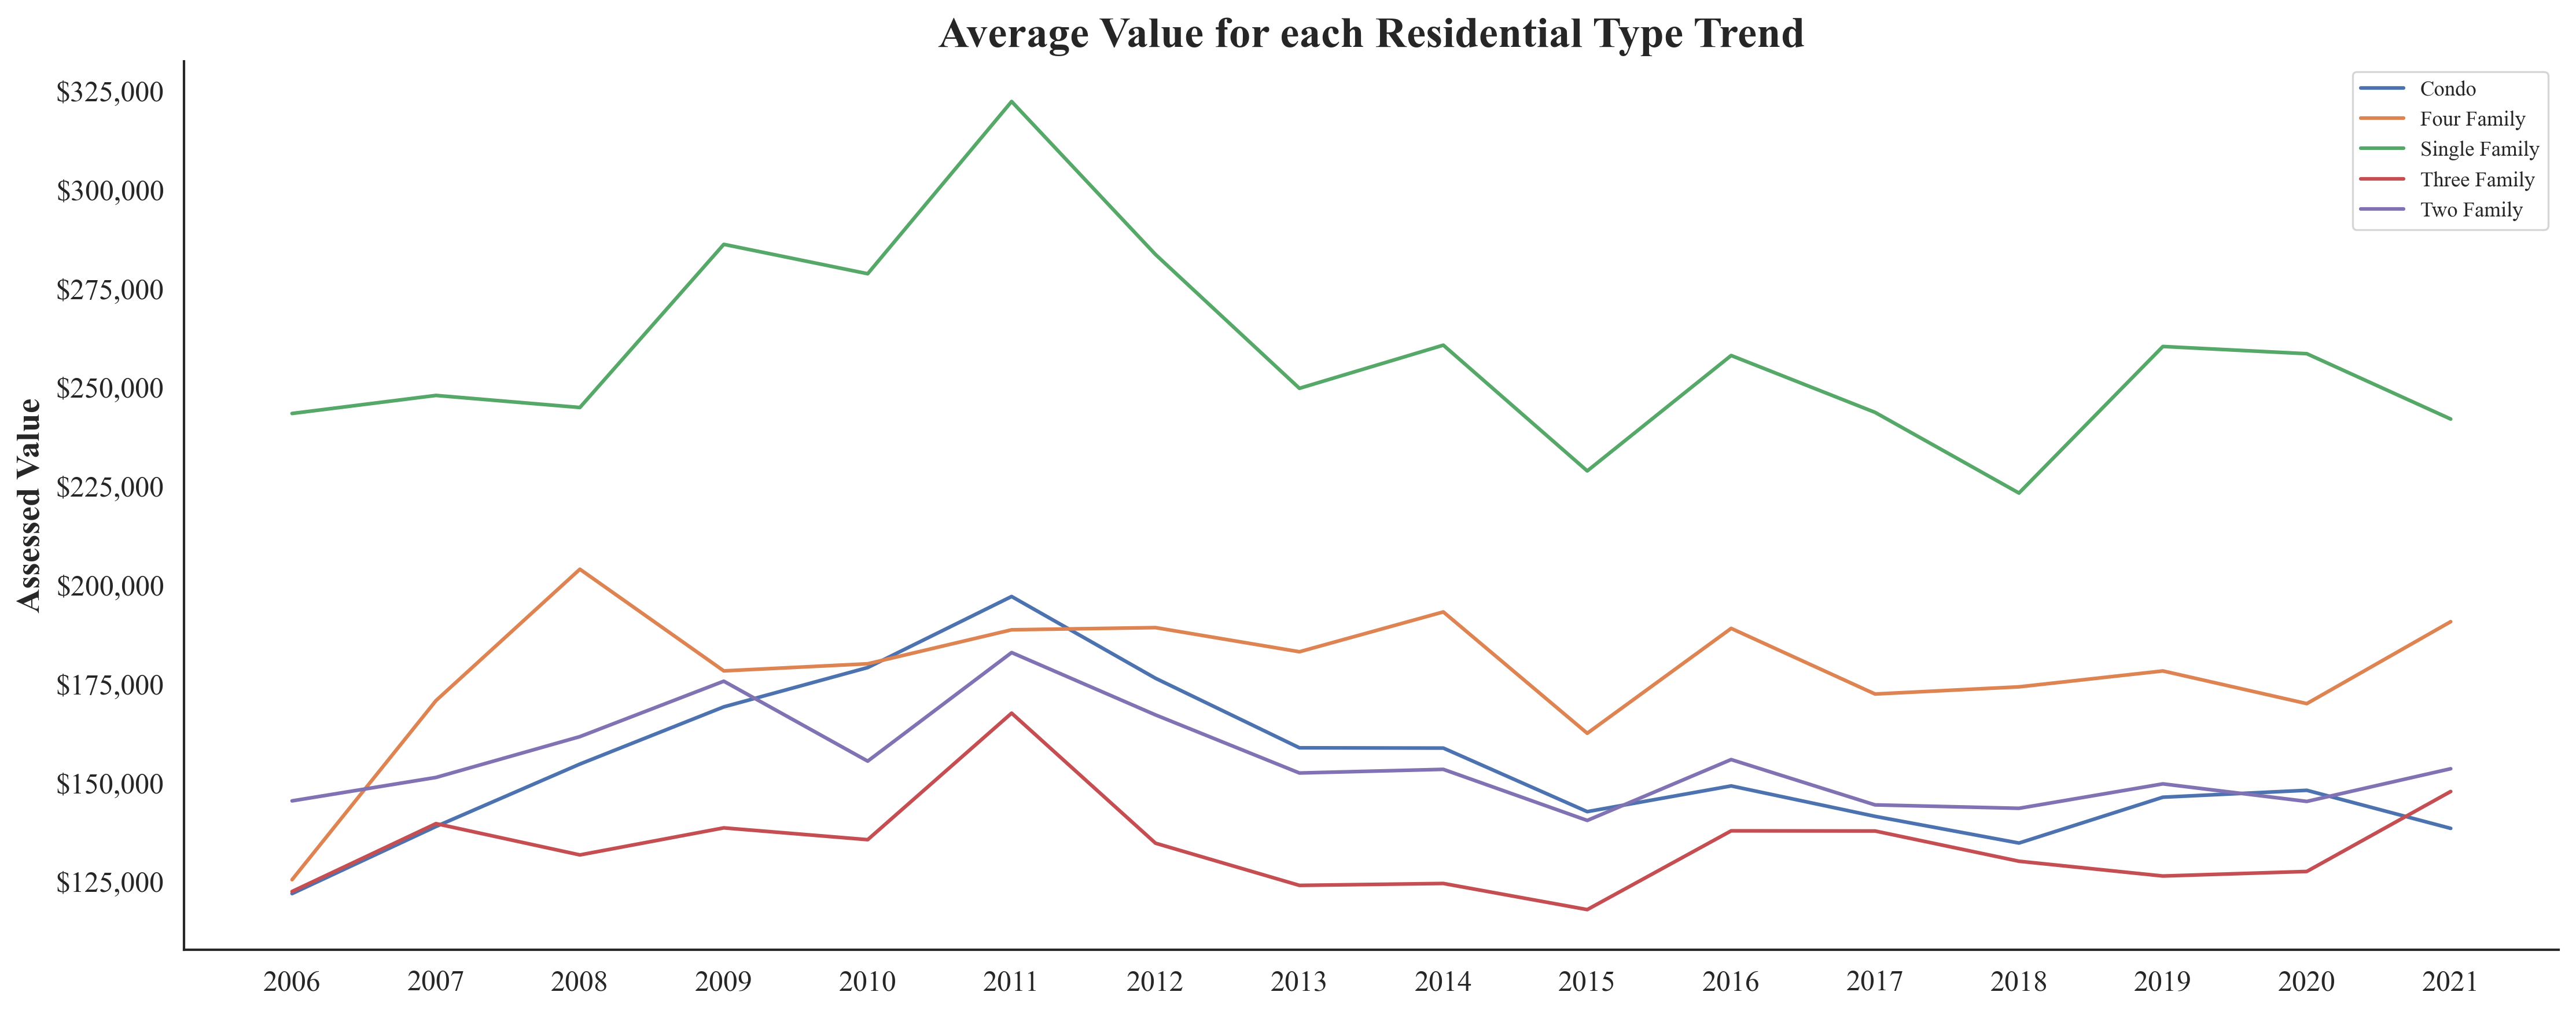

In [51]:
ax = property_value_per_year['Condo'].plot(legend=True)
property_value_per_year['Four Family'].plot(legend=True)
property_value_per_year['Single Family'].plot(legend=True)
property_value_per_year['Three Family'].plot(legend=True)
property_value_per_year['Two Family'].plot(legend=True)
ax.set_ylabel('Assessed Value', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_title('Average Value for each Residential Type Trend', loc='center', fontweight='bold')
ax.set_xticks(range(2006, 2022))
ax.set_xlabel('') 

plt.tight_layout();

### **(c) _Annual Sale Amount Trend_**

In [52]:
property_sale_amount_per_year = (property_df
                                    .reset_index()
                                    .pivot_table(
                                        index=['list_year'],
                                        columns='residential_type',
                                        values='sale_amount',
                                        aggfunc='mean'
                                        )
                                    .fillna(0)
                                    )
property_sale_amount_per_year

residential_type,Condo,Four Family,Single Family,Three Family,Two Family
list_year,,,,,
2006,"251,384.08","296,001.43","441,256.61","273,400.41","294,289.56"
2007,"250,457.82","295,864.81","400,761.90","262,915.53","255,868.13"
2008,"231,589.12","291,819.31","343,466.87","208,838.89","232,508.70"
2009,"239,007.12","232,156.42","391,295.74","200,094.32","238,558.13"
2010,"246,899.75","241,486.87","375,787.86","196,663.85","207,000.28"
2011,"270,622.23","288,681.92","442,428.64","224,800.39","245,820.18"
2012,"257,687.26","278,101.52","410,518.27","210,700.91","242,216.55"
2013,"256,378.72","282,797.92","378,695.73","201,037.73","229,702.13"
2014,"257,990.32","326,358.60","395,157.68","205,638.41","238,617.87"


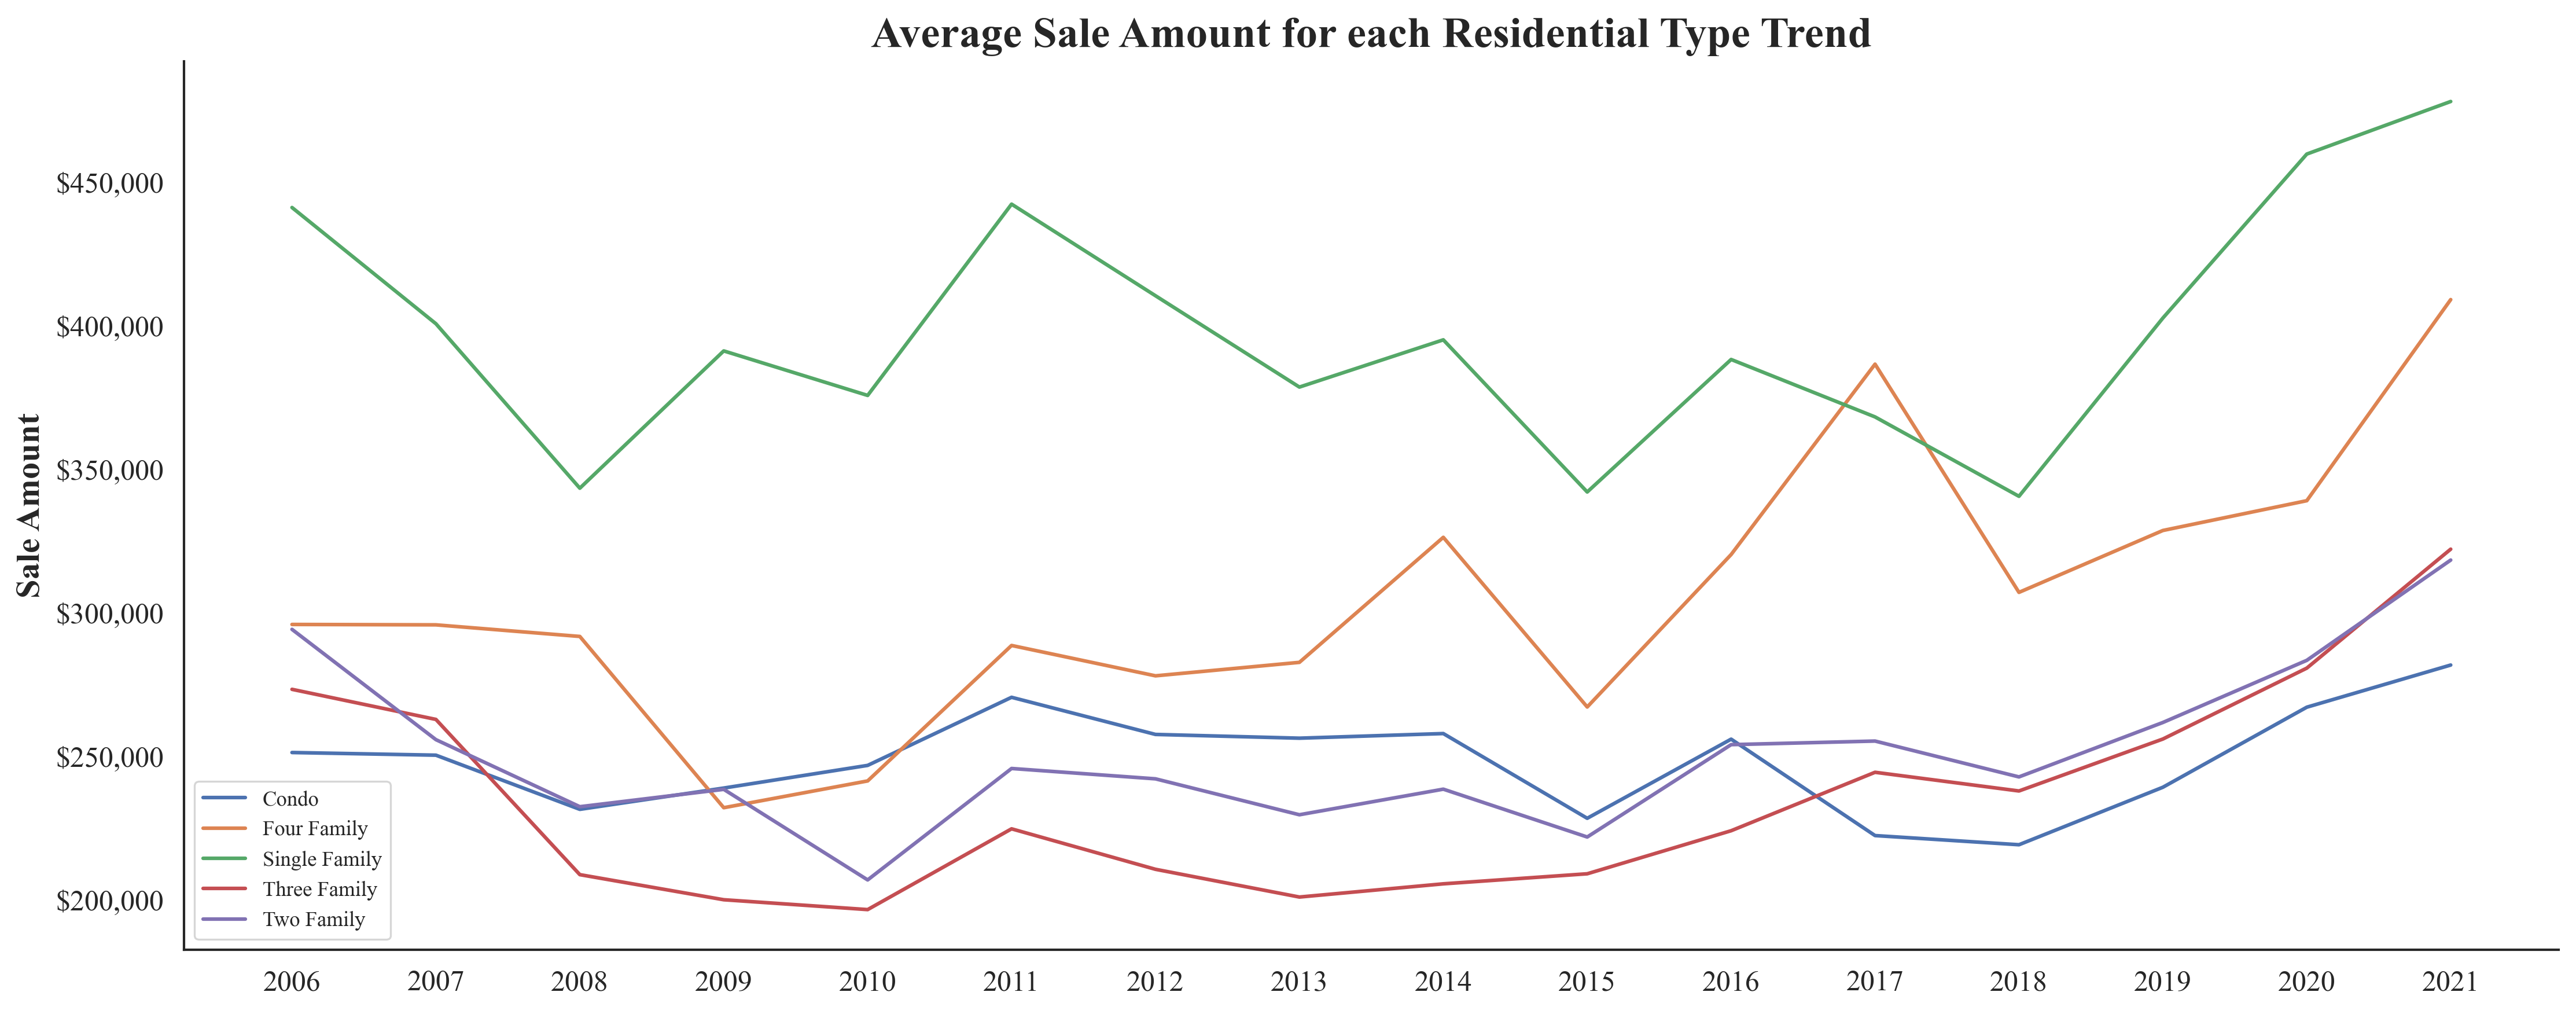

In [53]:
ax = property_sale_amount_per_year['Condo'].plot(legend=True)
property_sale_amount_per_year['Four Family'].plot(legend=True)
property_sale_amount_per_year['Single Family'].plot(legend=True)
property_sale_amount_per_year['Three Family'].plot(legend=True)
property_sale_amount_per_year['Two Family'].plot(legend=True)
ax.set_ylabel('Sale Amount', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_title('Average Sale Amount for each Residential Type Trend', loc='center', fontweight='bold')
ax.set_xticks(range(2006, 2022))
ax.set_xlabel('') 

plt.tight_layout();

## **Residential Type Distribution**

In [54]:
res_type_counts = pd.DataFrame(property_df['residential_type'].value_counts())
res_type_counts = res_type_counts.rename(columns = {'count':'volume'})
res_type_counts

,volume
residential_type,
Single Family,410637
Condo,114750
Two Family,23080
Three Family,10861
Four Family,1927


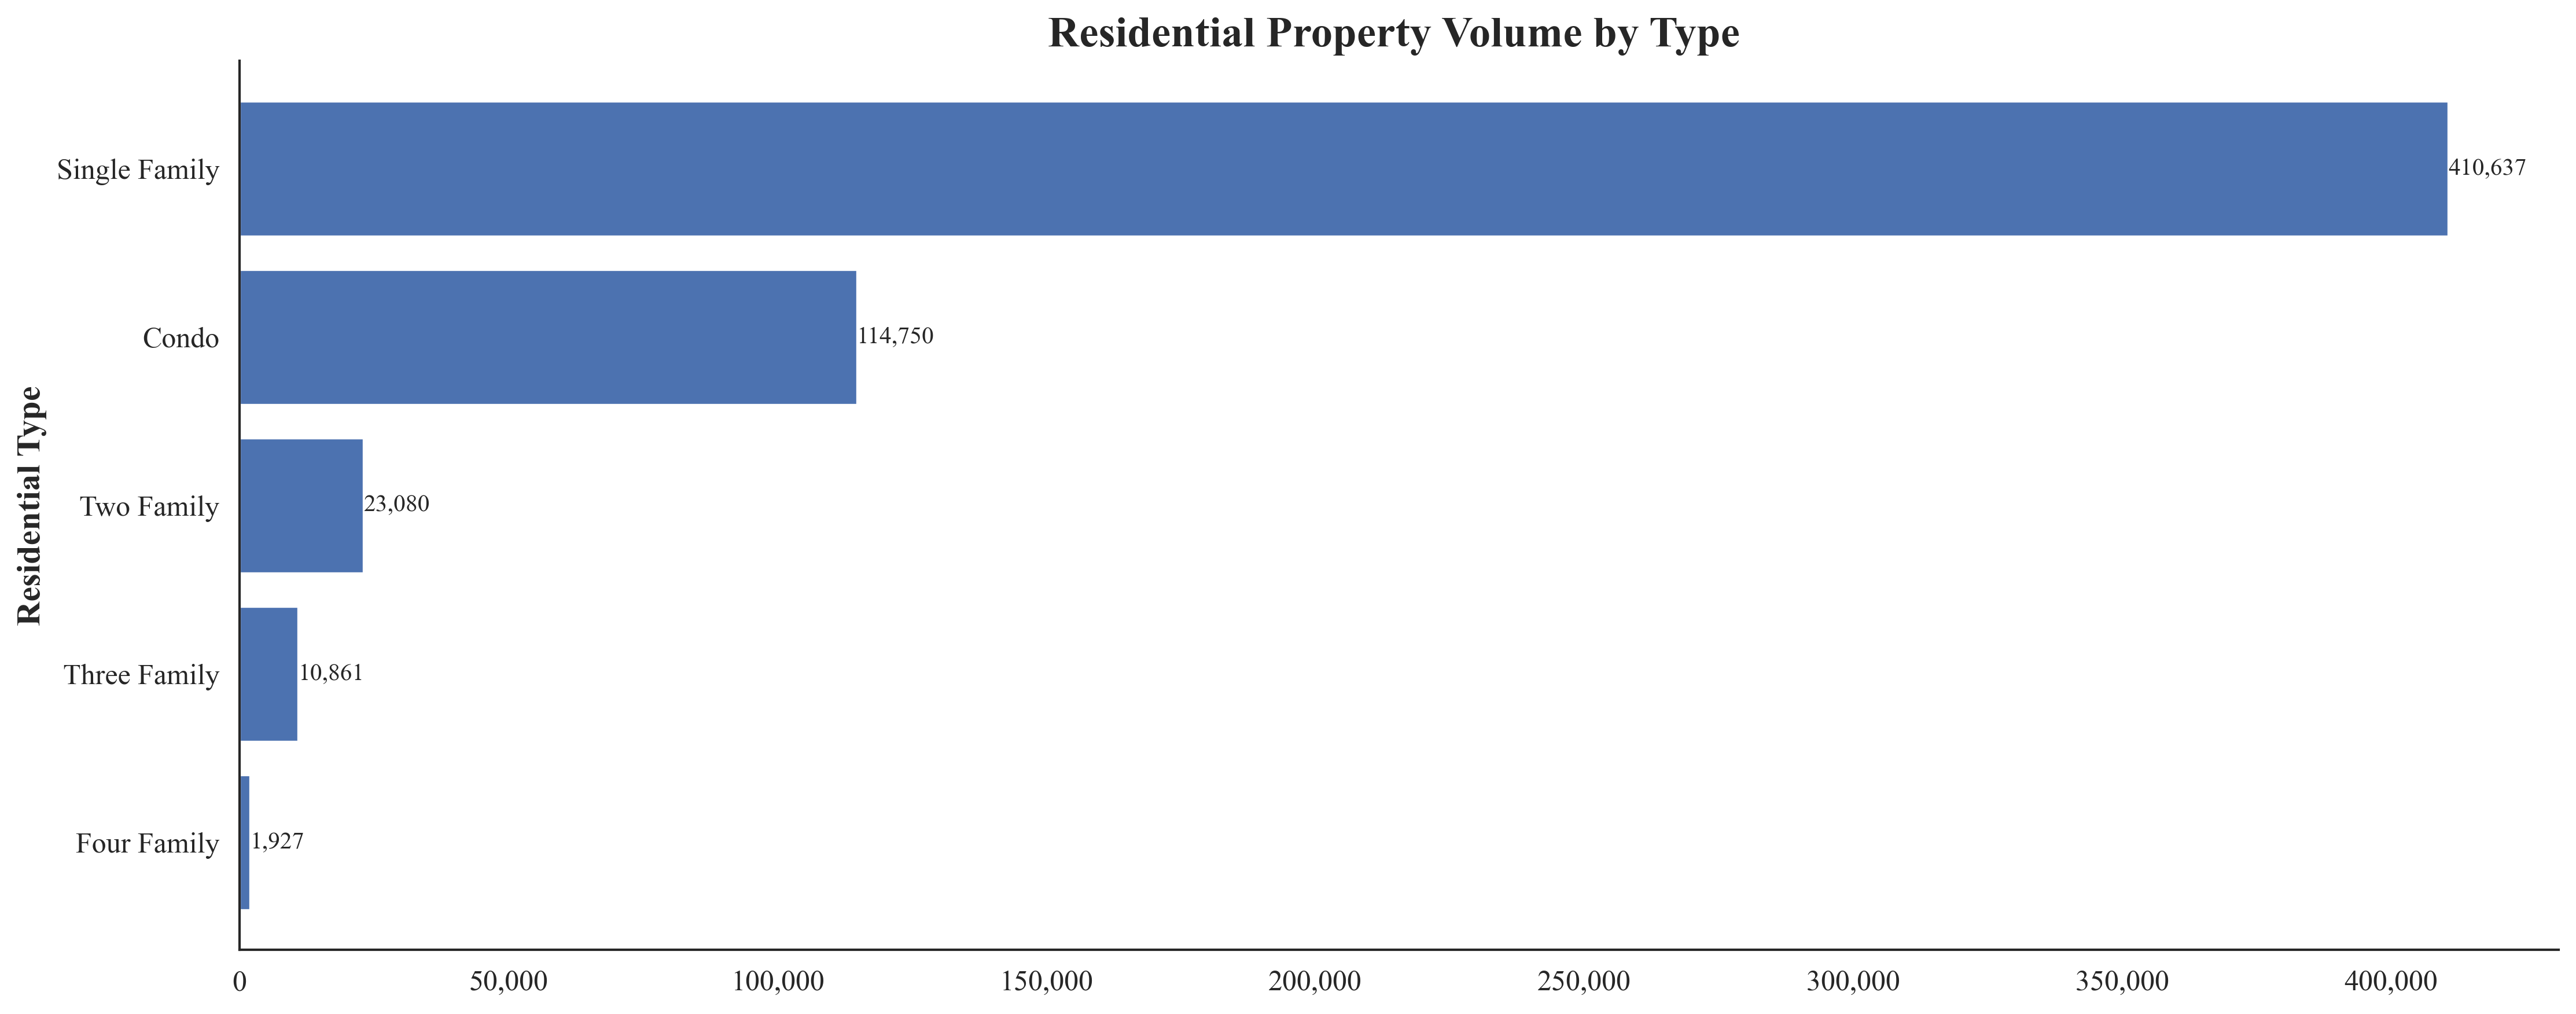

In [55]:
sorted_indices = sorted(range(len(res_type_counts['volume'])), key=lambda i: res_type_counts['volume'].iloc[i], reverse=False)
sorted_residential_types = [res_type_counts.index[i] for i in sorted_indices]
sorted_volumes = [res_type_counts['volume'].iloc[i] for i in sorted_indices]

fig, ax = plt.subplots()

ax.barh(sorted_residential_types, sorted_volumes)
ax.set_ylabel('Residential Type', loc='center', fontweight='bold')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Residential Property Volume by Type ', loc='center', fontweight='bold')

for i, volume in enumerate(sorted_volumes):
    ax.text(volume, i, f"{volume:,}", va="center", fontsize=10)

plt.tight_layout();

## **Annual Residential Properties Volume Listed**

In [56]:
annual_residential_properties_volume = (property_df
                                        .groupby(['list_year','residential_type'])
                                        .size()
                                        .unstack(fill_value=0)
                                        )
annual_residential_properties_volume 

residential_type,Condo,Four Family,Single Family,Three Family,Two Family
list_year,,,,,
2006,9145,95,28312,928,1877
2007,6057,72,20556,483,1248
2008,5337,51,17674,329,776
2009,6686,48,21813,402,883
2010,4299,47,16239,260,599
2011,3566,52,14784,217,476
2012,4474,50,19883,304,693
2013,5937,85,21251,485,978
2014,7181,93,27287,560,1240


In [57]:
per_town_residential_properties_volume = (property_df
                                        .groupby(['town','residential_type'])
                                        .size()
                                        .unstack(fill_value=0)
                                        )
per_town_residential_properties_volume 

residential_type,Condo,Four Family,Single Family,Three Family,Two Family
town,,,,,
Andover,0,0,438,0,4
Ansonia,85,34,1708,131,567
Ashford,22,0,557,0,12
Avon,1416,0,3166,2,2
Barkhamsted,0,0,533,1,4
...,...,...,...,...,...
Windsor Locks,675,2,1848,8,82
Wolcott,282,1,2402,1,19
Woodbridge,10,1,1628,0,37


### **Export summary tables to Excel**

In [59]:
""" with pd.ExcelWriter('residential_properties_summary.xlsx') as writer:
    property_df.to_excel(writer,
                         sheet_name='property_data', 
                         engine='xlsxwriter',
                         index=False)
    property_value_per_type_per_town.to_excel(writer,
                                              sheet_name='value_per_town',
                                              engine='xlsxwriter',
                                              index=False)
    property_value_per_year.to_excel(writer,
                                     sheet_name='annual_value', 
                                     engine='xlsxwriter',
                                     index=False)
    property_sale_amount_per_year.to_excel(writer,
                                           sheet_name='annual_sale_amount', 
                                           engine='xlsxwriter',
                                           index=False)
    res_type_counts.to_excel(writer,
                             sheet_name='residential_type_distribution', 
                             engine='xlsxwriter',
                             index=False)
    annual_residential_properties_volume.to_excel(writer,
                                                  sheet_name='annual_volume',
                                                  engine='xlsxwriter',
                                                  index=False)
    per_town_residential_properties_volume.to_excel(writer,
                                                    sheet_name='per_town_volume',
                                                    engine='xlsxwriter',
                                                    index=False) """